<a href="https://colab.research.google.com/github/yasmineJerbi03/Marketing-campaign-profit-boost/blob/main/Marketing_campaign_boosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1 - **Overview**

In [ ]:
# 1) Import the libraries that we will need

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 2) Load the data file into a new Pandas data frame called `house_sales_df` by calling the `read_csv` function in the Pandas library.
df = pd.read_csv ('data.csv',delimiter=';')

In [ ]:
# 3) Display the size of this data frame using the `shape` data member of `house_sales_df` data frame
df.shape

(2240, 29)

In [ ]:
## 3') display the column names using the `columns` data member 
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [ ]:
# 4) Display the first 10 rows of this data frame by calling the `head` method with `house_sales_df
df.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,2013-09-09,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,2012-11-13,34,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,2013-05-08,32,76,10,56,3,1,23,2,4,0,4,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,2013-06-06,19,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,2014-03-13,68,28,0,6,1,1,13,1,1,0,0,20,1,0,0,0,0,0,3,11,0


In [ ]:
# 5) Display the data types of the data frame columns using the `dtypes` data member of `house_sales_df`
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [ ]:
df.shape

(2240, 29)

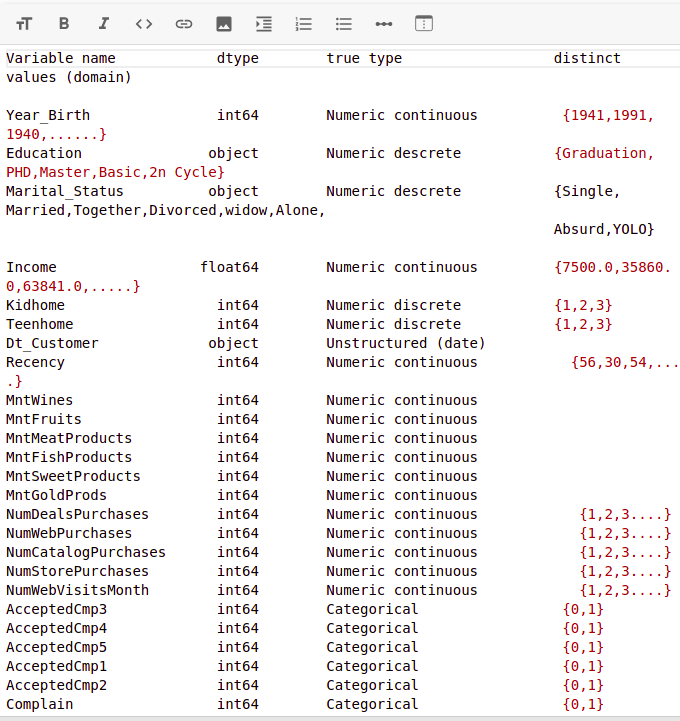

Variable name            dtype        true type                  distinct values (domain)

Year_Birth               int64        Numeric continuous          {1941,1991,1940,......}
Education               object        Numeric descrete           {Graduation,PHD,Master,Basic,2n Cycle}
Marital_Status          object        Numeric descrete           {Single,Married,Together,Divorced,widow,Alone,
                                                                 Absurd,YOLO}
                                                                 
Income                 float64        Numeric continuous         {7500.0,35860.0,63841.0,.....}
Kidhome                  int64        Numeric discrete           {1,2,3}
Teenhome                 int64        Numeric discrete           {1,2,3}        
Dt_Customer             object        Unstructured (date)
Recency                  int64        Numeric continuous           {56,30,54,....}
MntWines                 int64        Numeric continuous
MntFruits                int64        Numeric continuous
MntMeatProducts          int64        Numeric continuous
MntFishProducts          int64        Numeric continuous
MntSweetProducts         int64        Numeric continuous
MntGoldProds             int64        Numeric continuous
NumDealsPurchases        int64        Numeric continuous            {1,2,3....}
NumWebPurchases          int64        Numeric continuous            {1,2,3....}
NumCatalogPurchases      int64        Numeric continuous            {1,2,3....}
NumStorePurchases        int64        Numeric continuous            {1,2,3....}
NumWebVisitsMonth        int64        Numeric continuous            {1,2,3....}
AcceptedCmp3             int64        Categorical                 {0,1}
AcceptedCmp4             int64        Categorical                 {0,1}
AcceptedCmp5             int64        Categorical                 {0,1}
AcceptedCmp1             int64        Categorical                 {0,1}
AcceptedCmp2             int64        Categorical                 {0,1}
Complain                 int64        Categorical                 {0,1}
Z_CostContact            int64        Numeric discrete            {3}
Z_Revenue                int64        Numeric discrete            {11}
Response                 int64        Categorical                 {0,1}


In [ ]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

# **2 -Data exploration**
## **2.1 - Continuous attributes**

In [ ]:
continuous_variables = ['Year_Birth','Income','Recency','MntWines','MntFruits','MntMeatProducts','MntFishProducts', 'MntSweetProducts', 'MntGoldProds','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumWebVisitsMonth']
continuous_data_df = df[continuous_variables]


In [ ]:
continuous_data_df.describe()

,Year_Birth,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumWebVisitsMonth
count,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,1968.805804,52247.251354,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.316518
std,11.984069,25173.076661,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,2.426645
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1959.000000,35303.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000
50%,1970.000000,51381.500000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,6.000000
75%,1977.000000,68522.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,7.000000
max,1996.000000,666666.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,20.000000


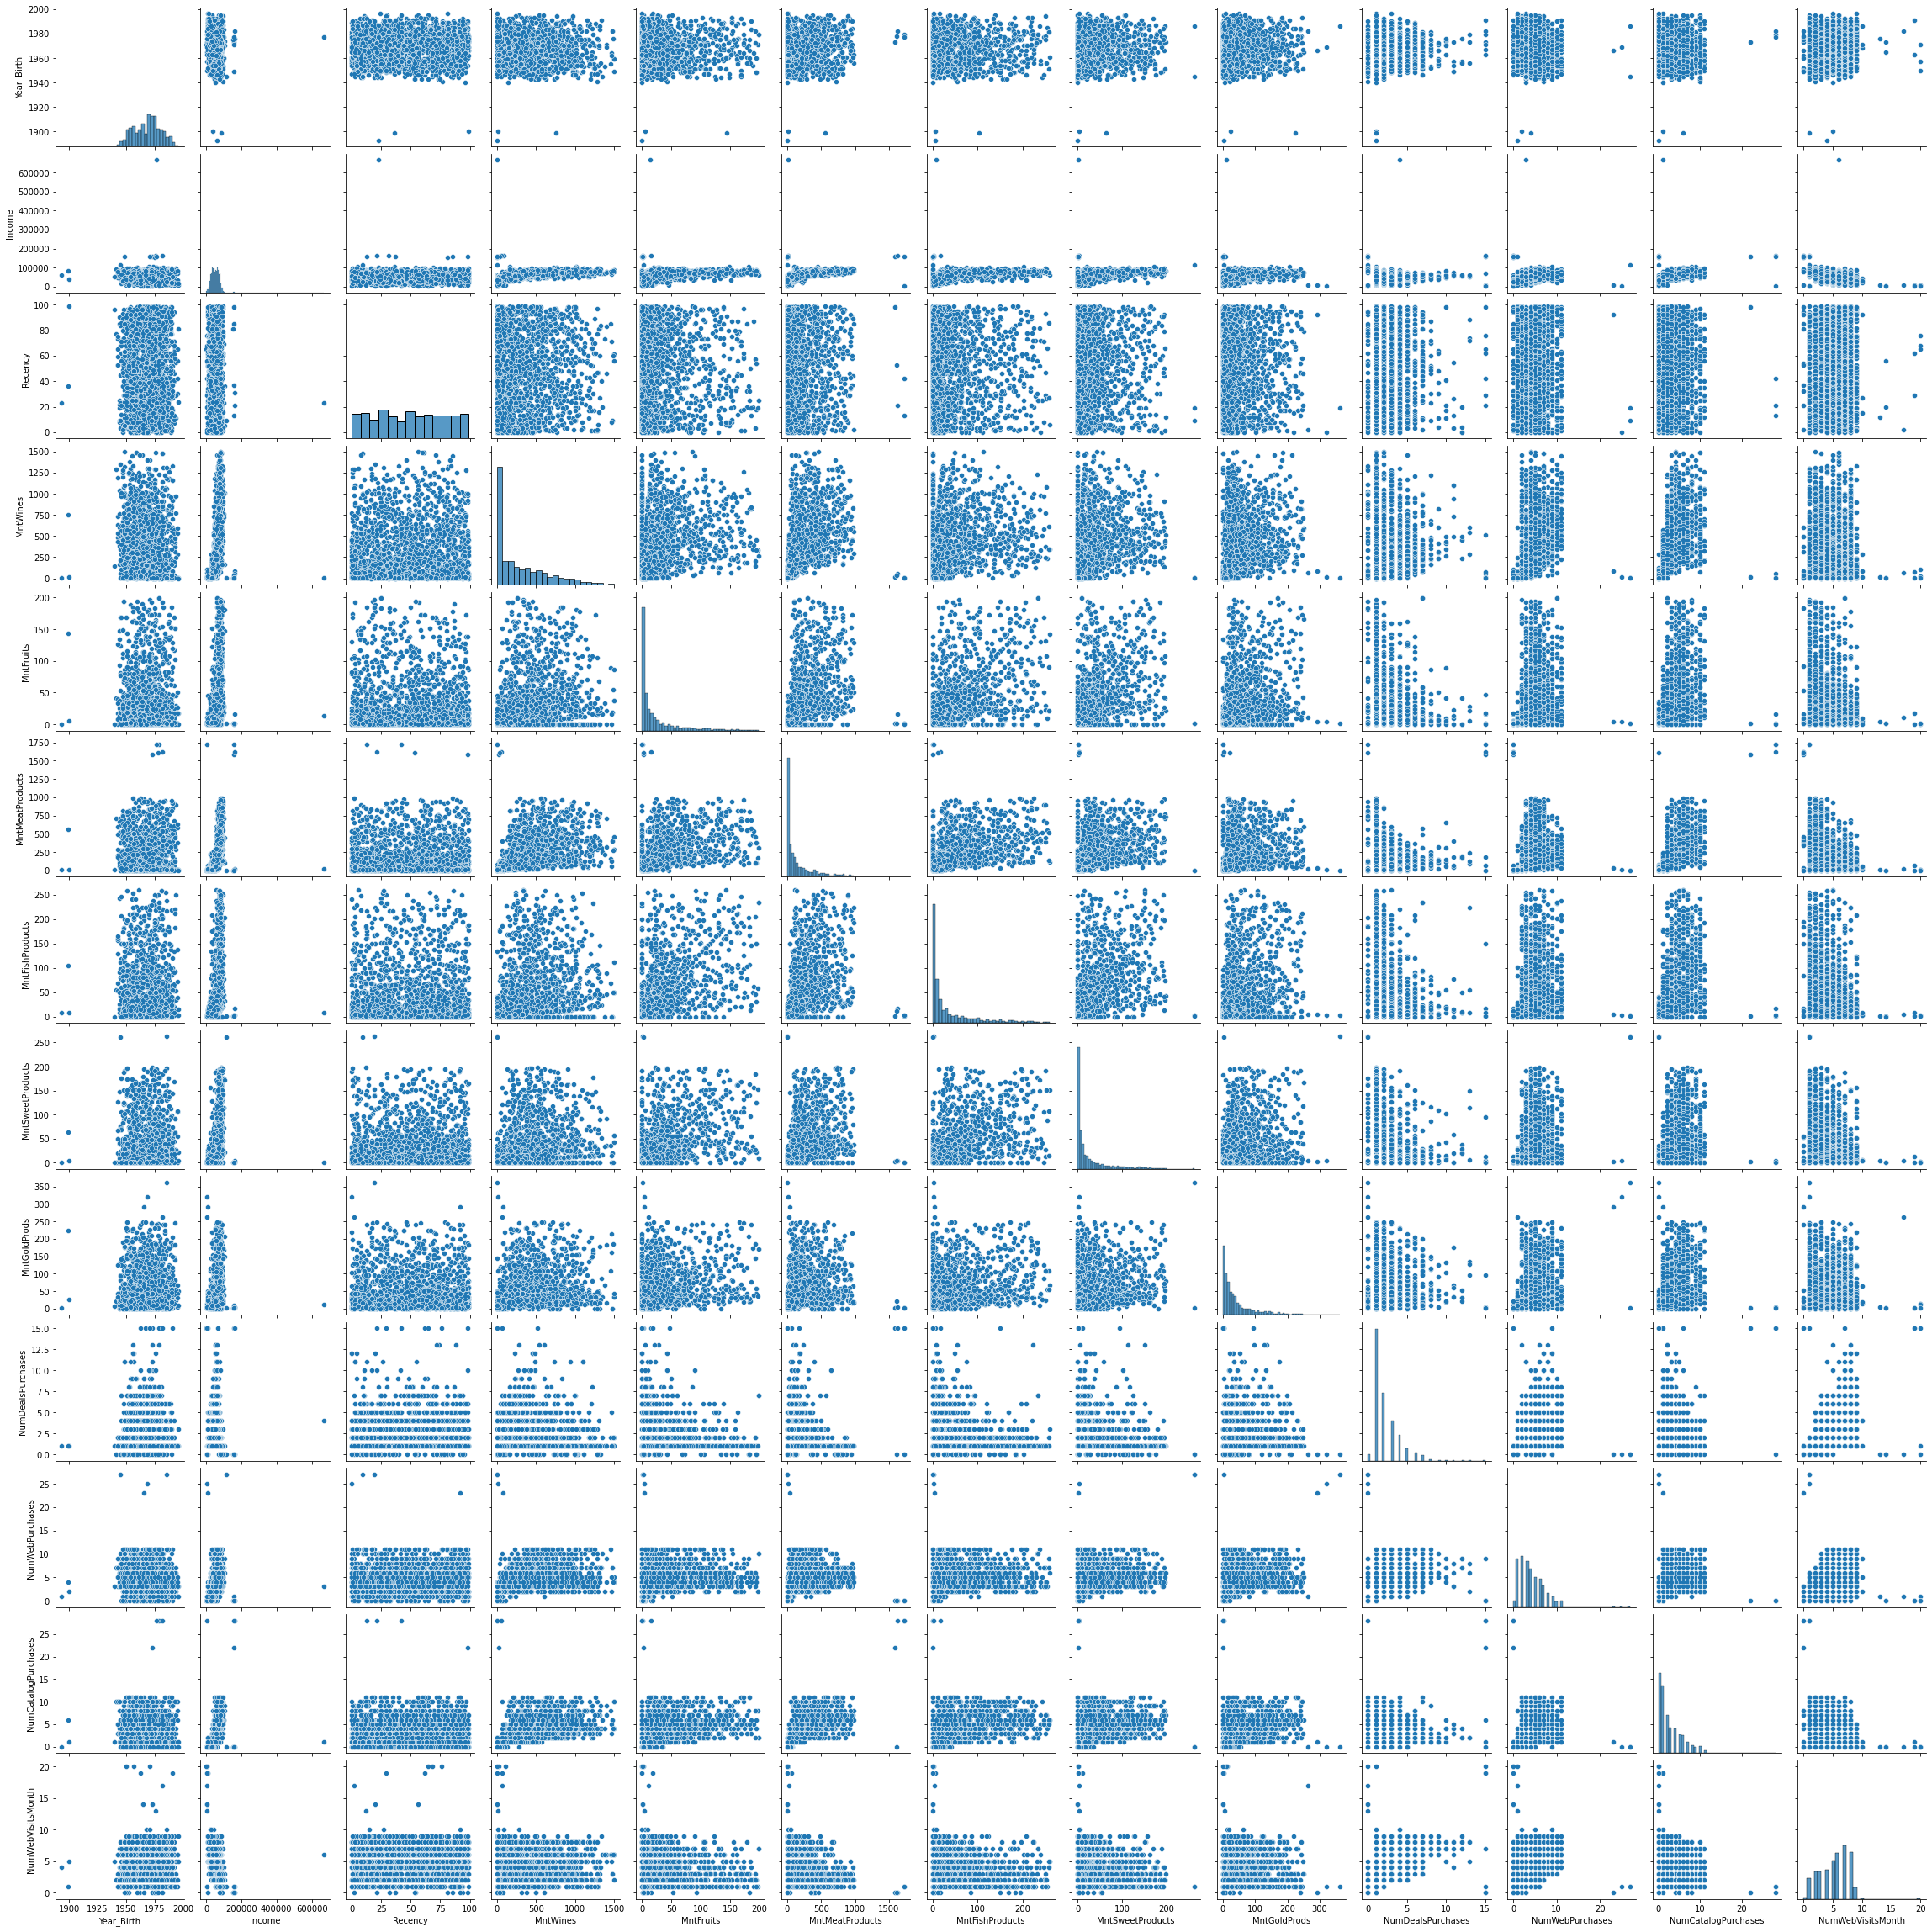

In [ ]:
#Q4. Visualize the bi-variate distributions of the continuous numeric columns by calling the pairsplot function from the seaborn library with the continuous_data_df data frame.
sns.pairplot(continuous_data_df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


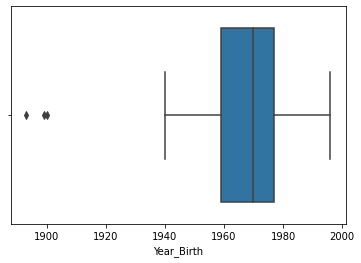

In [ ]:
sns.boxplot(df['Year_Birth'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


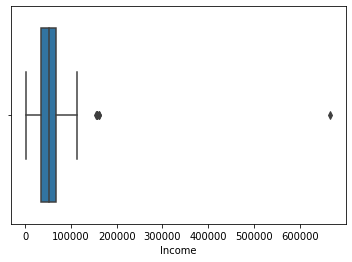

In [ ]:
sns.boxplot(df['Income'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


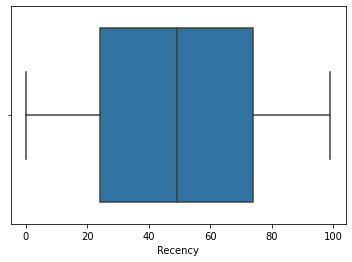

In [ ]:
sns.boxplot(df['Recency'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


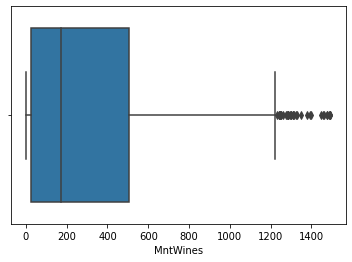

In [ ]:
sns.boxplot(df['MntWines'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


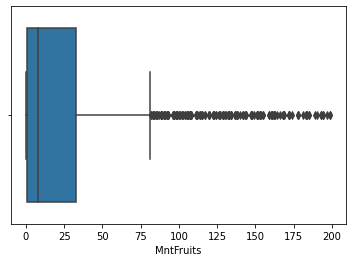

In [ ]:
sns.boxplot(df['MntFruits'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


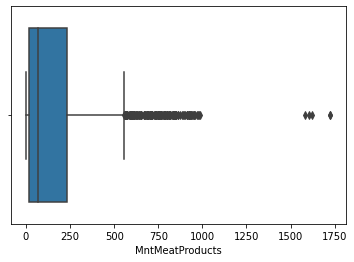

In [ ]:
sns.boxplot(df['MntMeatProducts'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


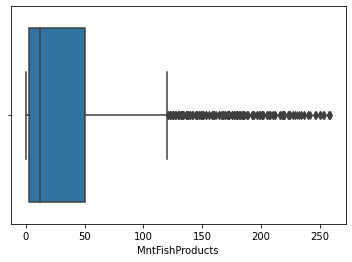

In [ ]:
sns.boxplot(df['MntFishProducts'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


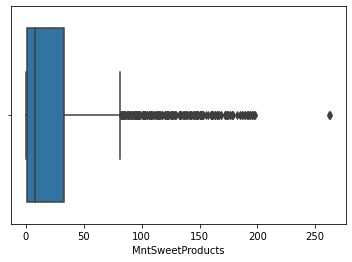

In [ ]:
sns.boxplot(df['MntSweetProducts'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


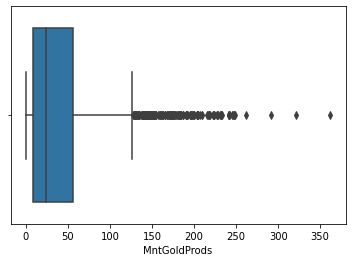

In [ ]:
sns.boxplot(df['MntGoldProds'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


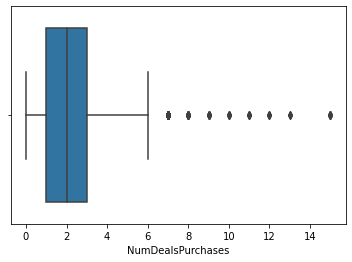

In [ ]:
sns.boxplot(df['NumDealsPurchases'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


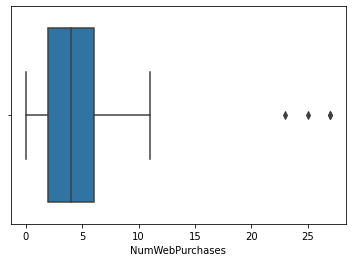

In [ ]:
sns.boxplot(df['NumWebPurchases'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


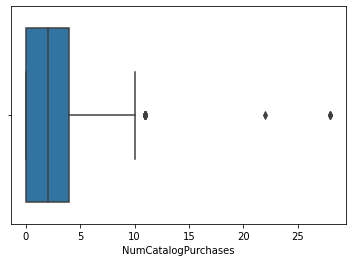

In [ ]:
sns.boxplot(df['NumCatalogPurchases'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


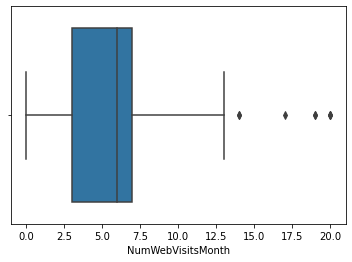

In [ ]:
sns.boxplot(df['NumWebVisitsMonth'])

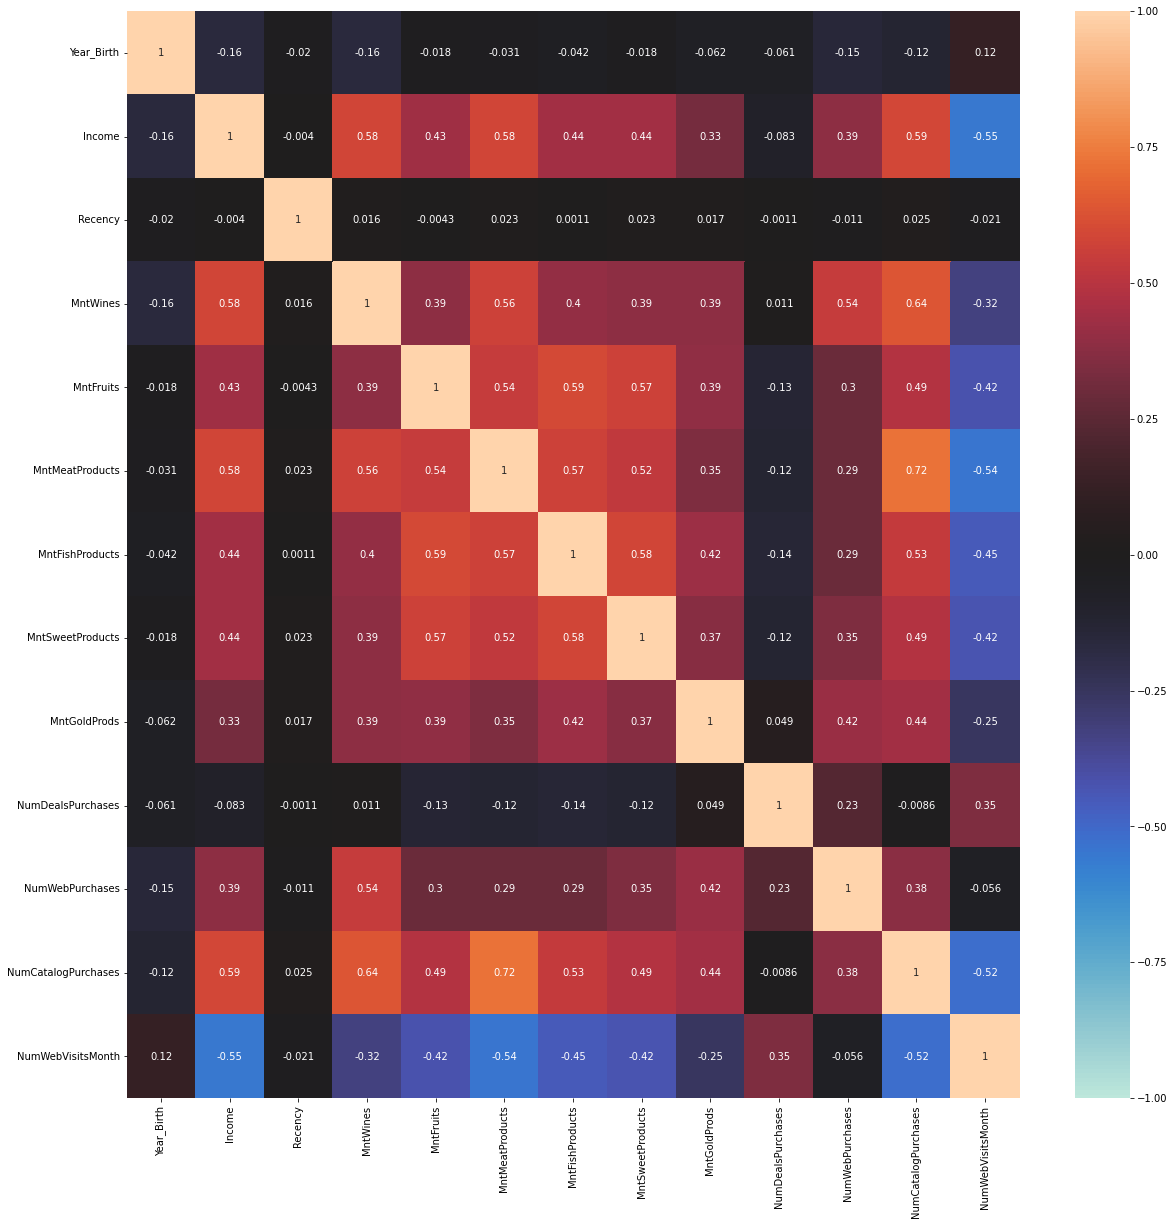

In [ ]:
plt.figure(figsize=(20,20))
corr=continuous_data_df.corr()
sns.heatmap(corr,vmin=-1,vmax=1,center=0,annot=True)

## **2.2 Discrete variables**

In [ ]:
dis_variables = ['Education','Marital_status','Kidhome','Teenhome','Z_CostContact','Z_Revenue']

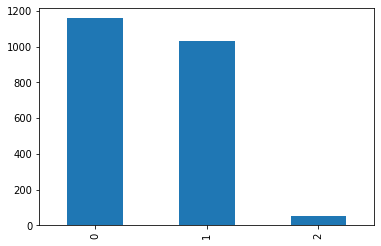

In [ ]:
df['Teenhome'].value_counts().plot.bar()

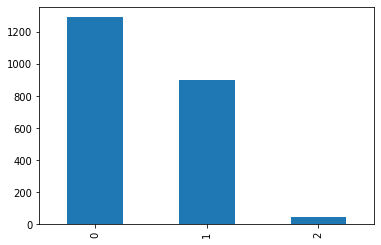

In [ ]:
df['Kidhome'].value_counts().plot.bar()

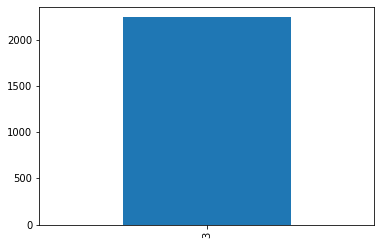

In [ ]:
df['Z_CostContact'].value_counts().plot.bar()

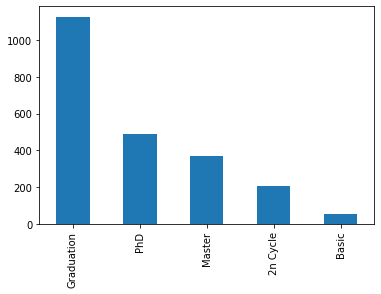

In [ ]:
df['Education'].value_counts().plot.bar()

In [ ]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


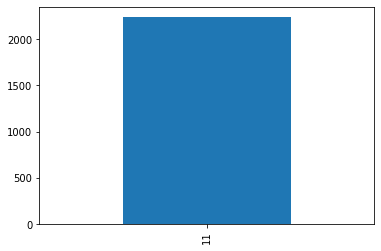

In [ ]:
df['Z_Revenue'].value_counts().plot.bar()

## **2.3 categorical variables**


In [ ]:
cat_variables = ['AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','AcceptedCmp1','AcceptedCmp2','Complain','Response']

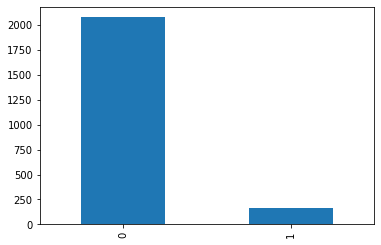

In [ ]:
df['AcceptedCmp3'].value_counts().plot.bar()

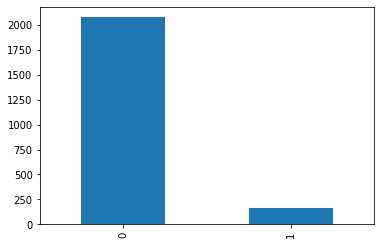

In [ ]:
df['AcceptedCmp4'].value_counts().plot.bar()

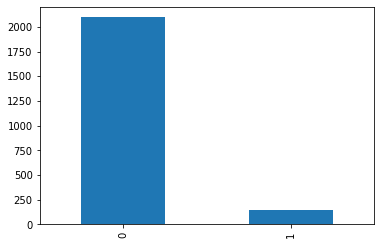

In [ ]:
df['AcceptedCmp1'].value_counts().plot.bar()

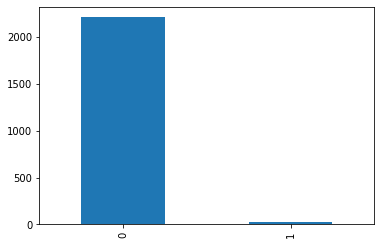

In [ ]:
df['AcceptedCmp2'].value_counts().plot.bar()

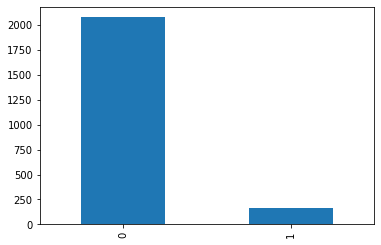

In [ ]:
df['AcceptedCmp5'].value_counts().plot.bar()

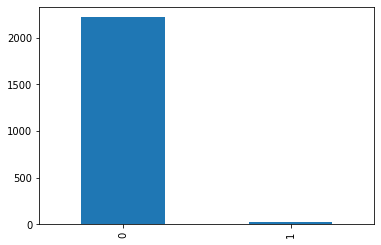

In [ ]:
df['Complain'].value_counts().plot.bar()

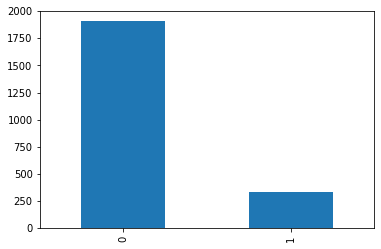

In [ ]:
df['Response'].value_counts().plot.bar()

# **3 - Data preparation**
## **3.1 Data cleaning**

Attributes

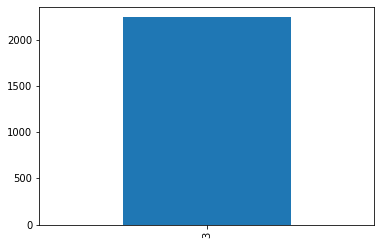

In [ ]:
df['Z_CostContact'].value_counts().plot.bar()

Tous les valeurs de l'attribut Z_costContact sont égale à 3 donc on peut supprimer cet attribut \\
Meme cas pour l'attribut Z_Revenue qui prend toujours la valeur 

In [ ]:
df.drop('Z_CostContact',axis=1,inplace = True)

In [ ]:
df.drop('Z_Revenue',axis=1,inplace = True)

In [ ]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


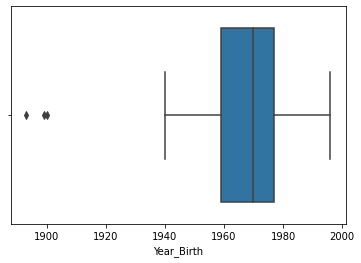

In [ ]:
sns.boxplot(df['Year_Birth'])

In [ ]:
dfa = df.copy()
dfa = dfa.loc[dfa['Year_Birth'] <1920]
dfa.shape

(3, 27)

3 observations abbérantes . on peut les supprimer 

In [ ]:
df = df.loc[df['Year_Birth'] >=1920]
df.shape

(2237, 27)

In [ ]:
df['Marital_Status'].value_counts()

Married     864
Together    579
Single      479
Divorced    231
Widow        77
Alone         3
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64

Absurd et Yolo sont considérés comme invalid values

In [ ]:
df = df.loc[df['Marital_Status'] != 'Absurd']
df = df.loc[df['Marital_Status'] != 'YOLO']

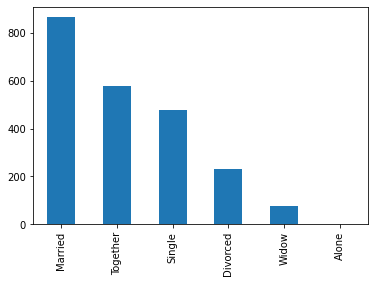

In [ ]:
df['Marital_Status'].value_counts().plot.bar()

In [ ]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
dtype: int64

24 observations ayant l'attribut Income nulle . On peut le remplacer par mean des valeurs de cet attributs

In [ ]:
df['Income'].fillna(df['Income'].mean(),inplace=True)

In [ ]:
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
dtype: int64

## **3.2 Feature engineering**

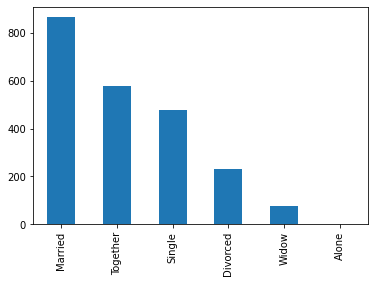

In [ ]:
df['Marital_Status'].value_counts().plot.bar()

Single et Alone ont la mm signification ==> Group categories

In [ ]:
df.replace(to_replace ="Alone",  
                 value = "Single",  
                  inplace = True)

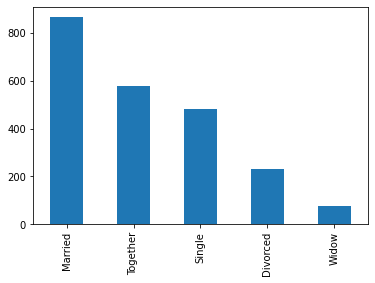

In [ ]:
df['Marital_Status'].value_counts().plot.bar()

One hot encoding

In [ ]:
df = pd.get_dummies(df, columns=['Education'])

In [ ]:
df = pd.get_dummies(df, columns=['Marital_Status'])

In [ ]:
df.head()

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow
0,5524,1957,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0
1,2174,1954,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
2,4141,1965,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
3,6182,1984,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,5324,1981,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0


Nous sommes dans le cas des données structurés . Pour la simplification on élimine l'attribut Dt_customer 

In [ ]:
df.drop('Dt_Customer',axis=1,inplace = True)

In [ ]:
df.head()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow
0,5524,1957,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0
1,2174,1954,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
2,4141,1965,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
3,6182,1984,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,5324,1981,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0


## **3.3 Data balancing**

Text(0.5, 1.0, 'Response to compaign')

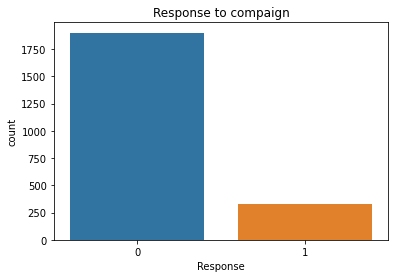

In [ ]:
class_distribution = df['Response'].value_counts()

sns.countplot(x='Response',data= df)
plt.title ('Response to compaign')

In [ ]:
df['Response'].value_counts()


0    1901
1     332
Name: Response, dtype: int64

In [ ]:
df1 = df.loc[df['Response'] == 0]
df2 = df.loc[df['Response'] == 1]

In [ ]:
df1 = df.drop(['Response'],axis = 1).values
df2 = df['Response'].values

In [ ]:
import imblearn
from imblearn.over_sampling import SMOTE 
sm = SMOTE()

In [ ]:
X = df.drop(['Response'],axis = 1).values
y = df['Response'].values

In [ ]:
X, y = sm.fit_resample(X, y)

In [ ]:
from collections import Counter
Counter(y)

Counter({0: 1901, 1: 1901})

# **4- Training and Evaluating Machine Learning Model**


In [ ]:
#Split_train_test_validation
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42 , shuffle =True)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((2851, 33), (951, 33), (2851,), (951,))

### **4-1 - KNN classifier**
### **4-1-1 - Training**


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import make_scorer,recall_score

In [ ]:
knn = KNeighborsClassifier()
knn_params = {'n_neighbors' : range(1,20)}
scorer = make_scorer(recall_score, average = 'weighted')
knn_classifier = GridSearchCV(knn,knn_params,cv=10,scoring=scorer)
knn_classifier.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 20)},
             scoring=make_scorer(recall_score, average=weighted))

In [ ]:
knn_classifier.best_params_,knn_classifier.best_score_

({'n_neighbors': 1}, 0.7993706293706294)

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report

best_knn = KNeighborsClassifier(n_neighbors = 1)
best_knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

### **4-1-2 - Evaluation**


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1416
           1       1.00      1.00      1.00      1435

    accuracy                           1.00      2851
   macro avg       1.00      1.00      1.00      2851
weighted avg       1.00      1.00      1.00      2851

[[1416    0]
 [   0 1435]]


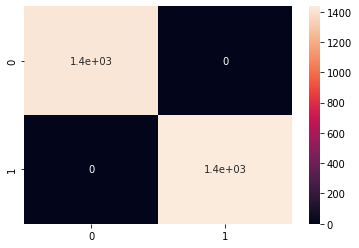

In [ ]:
knn_predict = best_knn.predict(X_train)
cmG = confusion_matrix(y_train,knn_predict)
sns.heatmap(cmG,annot=True)

print(classification_report(y_train,knn_predict))
print(confusion_matrix(y_train,knn_predict))

              precision    recall  f1-score   support

           0       0.85      0.73      0.79       485
           1       0.76      0.87      0.81       466

    accuracy                           0.80       951
   macro avg       0.80      0.80      0.80       951
weighted avg       0.80      0.80      0.80       951

[[354 131]
 [ 62 404]]


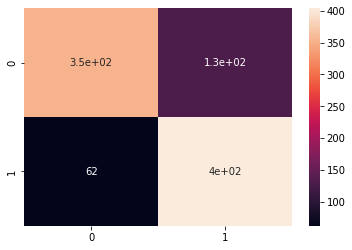

In [ ]:
knn_predict = best_knn.predict(X_test)
cmG_test = confusion_matrix(y_test,knn_predict)
sns.heatmap(cmG_test,annot=True)

print(classification_report(y_test,knn_predict))
print(cmG_test)

In [ ]:
# save model 
import pickle
pickle.dump(best_knn, open('model_3nn.pickle', 'wb')) 

### **4-2 - SVM**
### **4-2-1 - Training and evaluation**
#### **4-2-1-1 -RBF Kernel**


In [ ]:
from sklearn.svm import SVC 
from sklearn.model_selection import GridSearchCV

In [ ]:
svc_model =SVC()
svc_params = {"C":[0.1,1,5,10],"gamma":[0.01,0.1,1,10,100,1000],"kernel":['rbf']}
scorer = make_scorer(recall_score, average = 'weighted')
svc_classifier = GridSearchCV(svc_model,svc_params,cv=10,scoring=scorer)
svc_classifier.fit(X_train,y_train)
svc_classifier.best_params_,knn_classifier.best_score_

({'C': 5, 'gamma': 0.01, 'kernel': 'rbf'}, 0.7993706293706294)

In [ ]:
svc_model =SVC(C=5,gamma=0.01,kernel='rbf',probability=True)
svc_model.fit(X_train,y_train)

SVC(C=5, gamma=0.01, probability=True)

              precision    recall  f1-score   support

           0       0.54      1.00      0.70       485
           1       1.00      0.10      0.18       466

    accuracy                           0.56       951
   macro avg       0.77      0.55      0.44       951
weighted avg       0.76      0.56      0.44       951



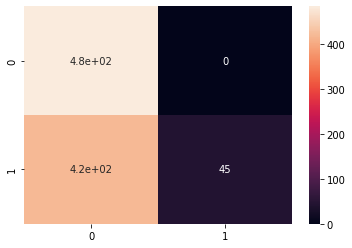

In [ ]:
y_predict = svc_model.predict(X_test)
cmG = confusion_matrix(y_test,y_predict)
sns.heatmap(cmG,annot=True)
print(classification_report(y_test,y_predict))

#### **4-2-1-2 -Polynomial Kernel**


In [ ]:
svc_model =SVC()
svc_params = {"C":[0.1,1,5,10],"degree":[2,3,4],"kernel":['poly']}
scorer = make_scorer(recall_score, average = 'weighted')
svc_classifier = GridSearchCV(svc_model,svc_params,cv=10,scoring=scorer)
svc_classifier.fit(X_train,y_train)

svc_classifier.best_params_,knn_classifier.best_score_

({'C': 10, 'degree': 3, 'kernel': 'poly'}, 0.7993706293706294)

In [ ]:
svc_model =SVC(C=10,degree=3,kernel='poly',probability=True)
svc_model.fit(X_train,y_train)

SVC(C=10, kernel='poly', probability=True)

              precision    recall  f1-score   support

           0       0.61      0.84      0.71       485
           1       0.73      0.44      0.55       466

    accuracy                           0.65       951
   macro avg       0.67      0.64      0.63       951
weighted avg       0.67      0.65      0.63       951

[[407  78]
 [259 207]]


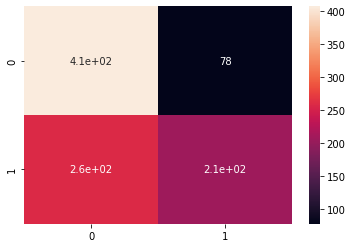

In [ ]:

y_predict = svc_model.predict(X_test)
cmG = confusion_matrix(y_test,y_predict)
sns.heatmap(cmG,annot=True)

print(classification_report(y_test,y_predict))
print(confusion_matrix(y_test,y_predict))

In [ ]:
pickle.dump(best_knn, open('model_svm_poly.pickle', 'wb')) 

### **4-3 - Random forest**
 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf =RandomForestClassifier()

from pprint import pprint
print('parameters currently in use : \n')
pprint(rf.get_params())

parameters currently in use : 

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [ ]:
n_estimators = [200,300]
max_features = [3,5]
max_depth = [2,4]
min_samples_split = [2,5]
min_samples_leaf=[1,4]
bootstrap = [True,False]
param_grid = {'n_estimators':n_estimators,
              'max_features':max_features,
              'max_depth':max_depth,
              'min_samples_split':min_samples_split,
              'min_samples_leaf':min_samples_leaf,
              'bootstrap':bootstrap

             }
print(param_grid)

{'n_estimators': [200, 300], 'max_features': [3, 5], 'max_depth': [2, 4], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 4], 'bootstrap': [True, False]}


In [ ]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(rf,param_grid,cv=3,n_jobs=-1)
grid_search.fit(X_train,y_train)
grid_search.best_params_

{'bootstrap': False,
 'max_depth': 4,
 'max_features': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 300}

In [ ]:
rf =RandomForestClassifier(n_estimators=300,max_depth=4,min_samples_split=5,min_samples_leaf=1,max_features=3,bootstrap=False)

In [ ]:
rf.fit(X_train,y_train)


RandomForestClassifier(bootstrap=False, max_depth=4, max_features=3,
                       min_samples_split=5, n_estimators=300)

              precision    recall  f1-score   support

           0       0.88      0.93      0.90       485
           1       0.92      0.86      0.89       466

    accuracy                           0.90       951
   macro avg       0.90      0.90      0.90       951
weighted avg       0.90      0.90      0.90       951

[[452  33]
 [ 64 402]]


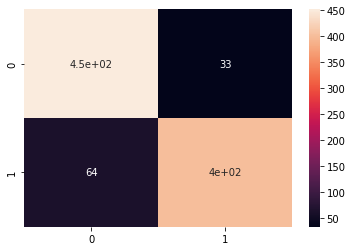

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
rf_predict = rf.predict(X_test)
cmG = confusion_matrix(y_test,rf_predict)
sns.heatmap(cmG,annot=True)
print(classification_report(y_test,rf_predict))
print(confusion_matrix(y_test,rf_predict))